In [134]:
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
from spike_stats import *

nvn=1
pvn=0
pcn=200
sstn=0

output_events=np.load('output_events_PC_Flat.npy')

output_events=np.asanyarray(output_events)

def spike_time_arrays(output_events,nvn,pvn,pcn,sstn):
    spike_times_all=output_events[1]-output_events[1][0]
    neuron_indexes=output_events[0]
    unique_neurons = np.unique(neuron_indexes)
    spike_times = [spike_times_all[neuron_indexes == i] for i in unique_neurons]
    spike_times = np.asanyarray(spike_times,dtype=object)
    spike_times_nvn=spike_times[0:nvn]
    spike_times_pvn=spike_times[nvn:nvn+pvn]
    spike_times_pcn=spike_times[nvn+pvn:nvn+pvn+pcn]
    spike_times_sstn=spike_times[nvn+pvn+pcn:nvn+pvn+pcn+sstn]
    return spike_times_nvn,spike_times_pvn,spike_times_pcn,spike_times_sstn

spike_times_nvn,spike_times_pvn,spike_times_pcn,spike_times_sstn=spike_time_arrays(output_events,nvn,pvn,pcn,sstn)



[array([0.      , 0.020408, 0.040816, 0.061224, 0.081632, 0.10204 ,
        0.122448, 0.142857, 0.163265, 0.183673, 0.204081, 0.224489,
        0.244897, 0.265306, 0.285714, 0.306122, 0.32653 , 0.346938,
        0.367346, 0.387755, 0.408163, 0.428571, 0.448979, 0.469387,
        0.489795, 0.510204, 0.530612, 0.55102 , 0.571428, 0.591836,
        0.612244, 0.632653, 0.653061, 0.673469, 0.693877, 0.714285,
        0.734693, 0.755102, 0.77551 , 0.795918, 0.816326, 0.836734,
        0.857142, 0.877551, 0.897959, 0.918367, 0.938775, 0.959183,
        0.979591, 1.      ])                                       ]
[array([0.000022, 0.006643, 0.013429, 0.020434, 0.027048, 0.033824,
        0.040844, 0.047489, 0.054283, 0.061249, 0.067906, 0.07471 ,
        0.081665, 0.088301, 0.095097, 0.102067, 0.108707, 0.115523,
        0.122479, 0.129119, 0.135898, 0.142887, 0.149523, 0.156327,
        0.163298, 0.16994 , 0.176741, 0.1837  , 0.190343, 0.197146,
        0.204104, 0.210748, 0.217533, 0.22451 ,

[334. 329. 242. 274. 296. 228. 304. 259. 258. 307. 217. 312. 292. 220.
 303. 247. 262. 294. 222. 295. 271. 246. 307. 215. 311. 302. 220. 298.
 259. 262. 304. 221. 299. 295. 224. 319. 195. 323. 293. 219. 293. 272.
 256. 298. 211. 307. 297. 232. 309. 199. 320. 301. 220. 299. 266. 250.
 297. 219. 307. 302. 218. 302. 213. 307. 297. 214. 309. 286. 226. 300.
 217. 300. 297. 210. 310. 205. 305. 300. 215. 306. 282. 232. 300. 219.
 296. 306. 218. 311. 188. 323.]


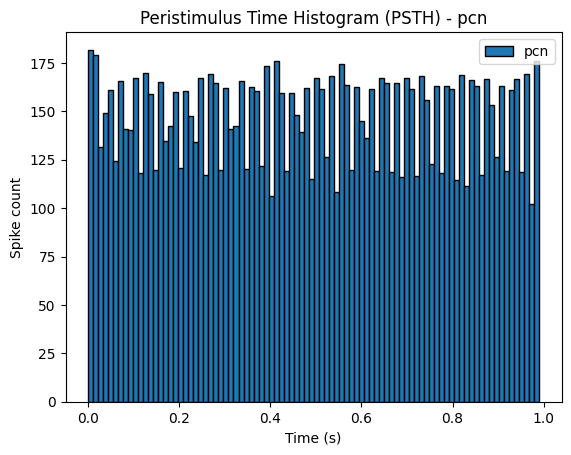

In [173]:


import numpy as np
import matplotlib.pyplot as plt

# Assuming spike_times_pcn is a list of spike times for the 'pcn' spike train
# Example: spike_times_pcn = [np.array([0.2, 0.3, 0.5]), np.array([0.1, 0.4, 0.6])]


# Assuming pcn is the number of trials for the 'pcn' spike train
# Example: pcn = 
pcn = len(spike_times_pcn)
bin_size = 0.011
bins = np.arange(0, 1, bin_size)
psth_pcn = np.zeros(len(bins) - 1)

for i in range(len(spike_times_pcn)):
    psth_pcn += np.histogram(spike_times_pcn[i], bins=bins)[0]

print(psth_pcn)
psth_pcn = psth_pcn / (pcn * bin_size)

# Plotting the PSTH as a bar graph with black border
#plt.bar(bins[:-1], psth_pcn, width=bin_size, align='edge', label='pcn')
plt.bar(bins[:-1], psth_pcn, width=bin_size, align='edge', label='pcn', edgecolor='black')
plt.xlabel('Time (s)')
plt.ylabel('Spike count')
plt.title('Peristimulus Time Histogram (PSTH) - pcn')
plt.legend()
plt.show()

In [ ]:


import numpy as np
import matplotlib.pyplot as plt

# Assuming spike_times_pcn is a list of spike times for the 'pcn' spike train
# Example: spike_times_pcn = [np.array([0.2, 0.3, 0.5]), np.array([0.1, 0.4, 0.6])]

def psth(spike_times, bin_size=0.011):
    """Calculate the peristimulus time histogram (PSTH) for a given spike train.
    Parameters
    ----------
    spike_times : list of numpy arrays
        Spike times for each trial.
    bin_size : float
        Bin size in seconds.
    Returns
    -------
    psth : numpy array
        PSTH values.
    bins : numpy array
        Bin edges.
    """
    # Calculate the number of trials
    n_trials = len(spike_times)
    # Calculate the bins
    bins = np.arange(0, 1, bin_size)
    # Calculate the PSTH
    psth = np.zeros(len(bins) - 1)
    for i in range(n_trials):
        psth += np.histogram(spike_times[i], bins=bins)[0]
    psth = psth / (n_trials * bin_size)
    return psth, bins
    
def plot_psth(spike_times, bin_size=0.011):
    """Plot the peristimulus time histogram (PSTH) for a given spike train.
    Parameters
    ----------
    spike_times : list of numpy arrays
        Spike times for each trial.
    bin_size : float
        Bin size in seconds.
    """
    # Calculate the PSTH
    psth, bins = psth(spike_times, bin_size)
    # Plot the PSTH
    plt.bar(bins[:-1], psth, width=bin_size, align='edge', label='pcn', edgecolor='black')
    plt.xlabel('Time (s)')
    plt.ylabel('Spike count')
    plt.title('Peristimulus Time Histogram (PSTH)')
    plt.show()